In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
r2mean = pd.read_csv("../outputs/prototype_predict_horizon/prototype_train_and_test_horizon-1.tsv", index_col=0, sep='\t')
weird_result = r2mean.index[r2mean.r2mean > -1e+16]
r2mean = r2mean[(r2mean.r2mean > -1e+16)]   # remove outliers

# stats on average r2 to quickly check the results
r2mean = sm.add_constant(r2mean)
formula = 'r2mean ~ const + C(site) + C(diagnosis)'
results = ols(formula, r2mean).fit()
print(results.summary(title="A very lazy linear model for a glance"))

                    A very lazy linear model for a glance                     
Dep. Variable:                 r2mean   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     171.6
Date:                Tue, 18 Jul 2023   Prob (F-statistic):          1.73e-313
Time:                        14:50:50   Log-Likelihood:                 1424.9
No. Observations:                 885   AIC:                            -2798.
Df Residuals:                     859   BIC:                            -2673.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

[Text(0, 0, 'abide1_site-NYU'),
 Text(1, 0, 'abide1_site-USM'),
 Text(2, 0, 'abide1_site-KKI'),
 Text(3, 0, 'abide1_site-SDSU'),
 Text(4, 0, 'abide1_site-MaxMun_c'),
 Text(5, 0, 'abide1_site-UCLA_1'),
 Text(6, 0, 'abide1_site-OHSU'),
 Text(7, 0, 'abide1_site-MaxMun_d'),
 Text(8, 0, 'abide1_site-MaxMun_a'),
 Text(9, 0, 'abide1_site-Trinity'),
 Text(10, 0, 'abide1_site-Olin'),
 Text(11, 0, 'abide1_site-Pitt'),
 Text(12, 0, 'abide1_site-MaxMun_b'),
 Text(13, 0, 'abide2_site-OHSU_1'),
 Text(14, 0, 'abide2_site-USM_1'),
 Text(15, 0, 'abide2_site-NYU_1'),
 Text(16, 0, 'abide2_site-BNI_1'),
 Text(17, 0, 'abide2_site-UCD_1'),
 Text(18, 0, 'abide2_site-GU_1'),
 Text(19, 0, 'abide2_site-IP_1'),
 Text(20, 0, 'abide2_site-UCLA_1'),
 Text(21, 0, 'abide2_site-TCD_1'),
 Text(22, 0, 'abide2_site-SDSU_1'),
 Text(23, 0, 'abide2_site-ETHZ_1'),
 Text(24, 0, 'abide2_site-IU_1')]

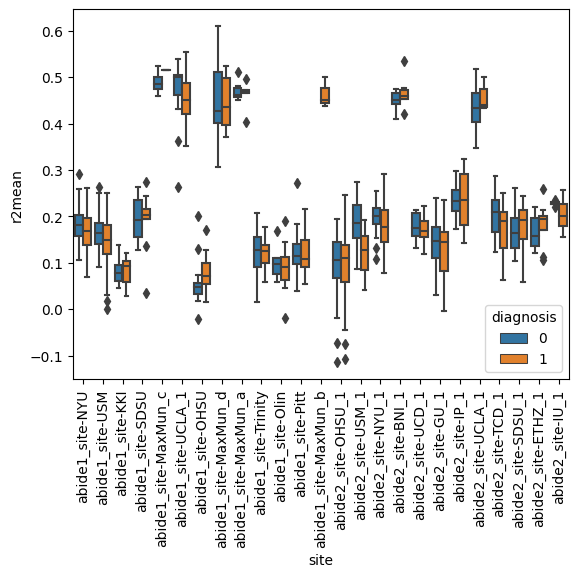

In [5]:
from seaborn import boxplot

g = boxplot(x="site", y="r2mean", hue="diagnosis", data=r2mean)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [ ]:
# from giga_companion.load_data import load_data, load_h5_data_path
# from nilearn.maskers import NiftiLabelsMasker
# from nilearn.plotting import view_img
# import numpy as np

# h5_paths = load_h5_data_path("../outputs/prototype_predict_horizon/prototype_train_and_test_horizon-1.h5", "_r2map")
# r2_raw = load_data("../outputs/prototype_predict_horizon/prototype_train_and_test_horizon-1.h5", h5_paths, "data")
# average_r2 = np.array(r2_raw).mean(axis=0)
# average_r2[average_r2 < -1e+8] = 0

# masker = NiftiLabelsMasker("../inputs/atlas/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_atlas-MIST_res-dataset_desc-197_dseg.nii.gz").fit()
# average_r2_nii = masker.inverse_transform(average_r2)
# view_img(average_r2_nii, vmax=average_r2.max())